# KBMOD Filtering  
  
This notebook demonstrates the basic functionality for loading and filtering results. KBMOD provides the ability to load results into a ``ResultList`` data structure and then apply a sequence of filters to those results. New filters can be defined by inheriting from the ``Filter`` class.

# Setup
Before importing, make sure you have installed kbmod using `pip install .` in the root directory.  Also be sure you are running with python3 and using the correct notebook kernel.

In [1]:
# everything we will need for this demo
from kbmod.filters.stamp_filters import StampPeakFilter
from kbmod.filters.stats_filters import LHFilter
from kbmod.result_list import load_result_list_from_files, ResultList
import matplotlib.pyplot as plt
import numpy as np

# Load the results

We use the fake result data provided in ``data/fake_results_noisy`` which is generated from 256 x 256 images with multiple fake objects inserted. KBMOD is run with wider than normal filter parameters so as to produce a noisy set of results.

In [2]:
results = load_result_list_from_files("../data/fake_results_noisy/", "DEMO")
print(f"Loaded {results.num_results()} results.")

# Turn on filtered result tracking.
results.track_filtered = True

# Show the first five results.
for i in range(5):
    print(results.results[i].trajectory)

Loaded 63 results.
lh: 101.154358 flux: 324.326111 x: 137 y: 223 x_v: 5.912628 y_v: -2.541327 obs_count: 10
lh: 100.192001 flux: 338.617279 x: 65 y: 35 x_v: 33.117329 y_v: 8.368979 obs_count: 9
lh: 99.942947 flux: 320.442017 x: 172 y: 90 x_v: 9.832990 y_v: 9.769869 obs_count: 10
lh: 98.004997 flux: 314.228455 x: 28 y: 18 x_v: 27.417599 y_v: 4.102125 obs_count: 10
lh: 97.840546 flux: 313.701202 x: 209 y: 45 x_v: 4.724518 y_v: 5.728925 obs_count: 10


# Try some filtering

First we create a filter based on the observations' likelihood and apply it to the result set.

In [3]:
# Filter out all results that have a likelihood < 40.0.
filter1 = LHFilter(40.0, None)
print(f"Applying {filter1.get_filter_name()}")
results.apply_filter(filter1)
print(f"{results.num_results()} results remaining.")

Applying LH_Filter_40.0_to_None
45 results remaining.


We can look at the rows that passed the filter. These are stored in the ``ResultList``'s ``results`` list. 

In [4]:
for i in range(5):
    print(results.results[i].trajectory)

lh: 101.154358 flux: 324.326111 x: 137 y: 223 x_v: 5.912628 y_v: -2.541327 obs_count: 10
lh: 100.192001 flux: 338.617279 x: 65 y: 35 x_v: 33.117329 y_v: 8.368979 obs_count: 9
lh: 99.942947 flux: 320.442017 x: 172 y: 90 x_v: 9.832990 y_v: 9.769869 obs_count: 10
lh: 98.004997 flux: 314.228455 x: 28 y: 18 x_v: 27.417599 y_v: 4.102125 obs_count: 10
lh: 97.840546 flux: 313.701202 x: 209 y: 45 x_v: 4.724518 y_v: 5.728925 obs_count: 10


Because we set ``results.track_filtered = True`` above, the ``ResultList`` also keeps each row that was rejected by one of the filters. These rows are indexed by the filter name, allowing the user to determine which rows were removed during which filtering stage. 

We can use the ``get_filtered`` function to retrieve all the filtered rows for a given filter name:

In [5]:
# Extract the rows that did not pass filter1.
filtered_list = results.get_filtered(filter1.get_filter_name())
for i in range(5):
    print(filtered_list[i].trajectory)

lh: 38.255047 flux: 146.601028 x: 225 y: 121 x_v: 15.193045 y_v: 4.486331 obs_count: 7
lh: 37.409382 flux: 143.360275 x: 29 y: 44 x_v: 26.815691 y_v: -22.723045 obs_count: 7
lh: 36.794891 flux: 141.005432 x: 113 y: 186 x_v: 29.667107 y_v: 34.556755 obs_count: 7
lh: 36.716217 flux: 140.703934 x: 242 y: 86 x_v: 6.719458 y_v: -1.698054 obs_count: 7
lh: 36.522682 flux: 139.962265 x: 234 y: 105 x_v: 10.740549 y_v: 10.257057 obs_count: 7


We can apply multiple filters to the ``ResultList`` to progressively rule out more and more candidate trajectories. We can even apply the same filter with different parameters.

Next we apply the ``StampPeakFilter``:

In [6]:
# Filter out all results where the peak location in the stamp is great than or equal to
# 1.5 pixels from the center.
filter2 = StampPeakFilter(10, 0.1, 0.1)
print(f"Applying {filter2.get_filter_name()}")
results.apply_filter(filter2)
print(f"{results.num_results()} results remaining.")

Applying StampPeakFilter_0.1_0.1
8 results remaining.


To visualize the effect of this filter, we can plot one of the unfiltered stamps and one of the filtered stamps. Note that we retrieve the rows filtered by the ``StampPeakFilter`` using the ``get_filtered`` with the filter’s name.

Text(0.5, 1.0, 'Filtered Stamp')

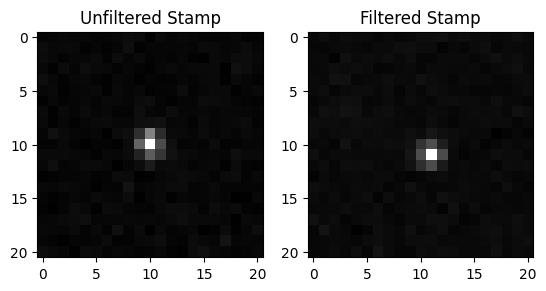

In [7]:
fig, axs = plt.subplots(1, 2)

unfiltered_stamp = np.array(results.results[0].stamp).reshape([21, 21])
axs[0].imshow(unfiltered_stamp, cmap="gray")
axs[0].set_title("Unfiltered Stamp")

filtered_list2 = results.get_filtered(filter2.get_filter_name())
filtered_stamp = np.array(filtered_list2[0].stamp).reshape([21, 21])
axs[1].imshow(filtered_stamp, cmap="gray")
axs[1].set_title("Filtered Stamp")